Avtor: **Jan Tomec, 23140220**, (Blaž Starc)

Datum: 4. januar 2016

*Potrjujem, da sem avtor projektne naloge in da sem vso vsebino pripravil sam. V primeru, da se ugotovi plagiatorstvo se zavedam, da ne bom izpolnjeval pogojev za pristop k izpitu.*

# Reševanje praktičnega primera

## 1. Definicija naloge

Na ledenem planetu “Starkiller base“ imajo pogosto snežne nevihte. Te se pojavijo z verjetnostjo $P(t) = tanh((t/30)^2)$ od začetka prejšnje.
Jakost nevihte se spreminja sinusno $j(t) = sin(t)$, največ naenkrat pa lahko pada $15 cm/min$ snega. Gostota snega je $0.92 kg/dm^3$.
Sneg zaradi močno segretega, ravno uporabljenega, superorožja kopni hitro, kar $1.6 m/h$ ob lepem vremenu in $0.6 m/h$ ob slabem.

Vsi zaposleni so odšli za en teden na dopust. Koliko snega bodo morali očistiti s strehe superlaserja? Streha ima obliko ravne kvadratna plošče s stranico $100 m$, sol na tem planetu pa traja $1.15$ zemeljskega dne.

Poišči tudi trenutek, v katerem je bilo na strehi največ snega.

In [1]:
import numpy as np

In [2]:
import random

In [3]:
#verjetnost, da nastane nevihta
def P(t):
    return np.tanh((t/27)**2)

In [4]:
sol = 1.15*24 #h
teden = 7*sol
teden

193.2

In [5]:
t = np.linspace(0, teden, teden)

In [6]:
def random_pool_pick(t):
    probs = int(np.round(P(t)*10000)) #število "pravih" elementov v bazenu
    pool = np.zeros((10000)) #število vseh elementov v bazenu
    pool[0:probs] = 1
    return random.choice(pool) #naključno izberem en element iz bazena

In [7]:
t0 = 0 #predstavlja čas začetka zadnje nevihte
t_nevihtni = [] #predstavlja čase neviht
for ti in t:
    if random_pool_pick(ti-t0) == 1:
        t_nevihtni.append(ti)
        t0 = ti

In [8]:
t_nevihtni #v teh trenutkih se je zgodila snežna nevihta (čas je v urah)

[8.0499999999999989,
 21.131249999999998,
 36.224999999999994,
 47.293749999999996,
 62.387499999999989,
 71.443749999999994,
 82.512499999999989,
 95.593749999999986,
 110.68749999999999,
 119.74374999999998,
 130.81249999999997,
 140.87499999999997,
 152.94999999999999,
 159.99374999999998,
 166.03124999999997,
 169.04999999999998,
 181.12499999999997,
 193.19999999999999]

In [9]:
def sneg(t0):
    sneg_m = 0.15*60
    tn = t0 + np.pi #polovica periode sinusa je π, toliko ur tudi trajajo nevihte
    tr = np.linspace(t0, tn, 500)
    return tr, [np.sin(tri - t0)*sneg_m for tri in tr]

### Graf funkcije $sneg(t)$:

In [10]:
import matplotlib.pyplot as plt

In [11]:
%matplotlib inline

In [12]:
čas = np.array([sneg(ti)[0] for ti in t_nevihtni])
sneg_padanje = np.array([sneg(ti)[1] for ti in t_nevihtni])

In [13]:
čas = čas.flatten()
sneg_padanje = sneg_padanje.flatten()

(0, 193.2)

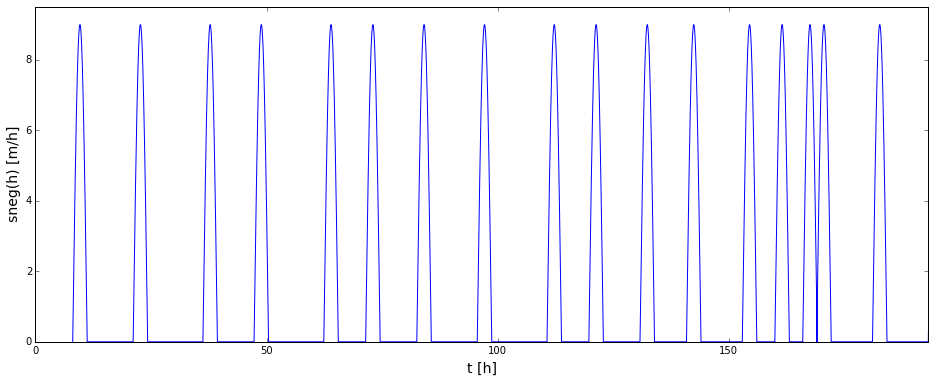

In [14]:
f, (sneženi_viharji) = plt.subplots(1, figsize=(16,6))
sneženi_viharji.plot(čas, sneg_padanje)
sneženi_viharji.set_xlabel('t [h]', fontsize = 14)
sneženi_viharji.set_ylabel('sneg(h) [m/h]', fontsize = 14)
sneženi_viharji.set_ylim(0, 9.5)
sneženi_viharji.set_xlim(0, teden)

### Graf debeline snežne odeje na strehi

In [15]:
from scipy.integrate import cumtrapz, simps, romberg

In [16]:
def sneg_kopnenje(t):
    sneg_m = 0.15*60
    v_snega = -v_kopnenje_hitro
    if t <= t_nevihtni[0]:
        v_snega = 0
    for i in t_nevihtni:
        if i <= t <= i+np.pi:
            v_snega = sneg_m*np.sin(t - i) - v_kopnenje_počasno
            break
    return v_snega

In [17]:
čas_dopusta = np.linspace(0, teden, 1000)

In [18]:
v_kopnenje_hitro = 1.6 #m/h
v_kopnenje_počasno = 0.6 #m/h

In [19]:
hitrost_padanja = np.array([sneg_kopnenje(ti) for ti in čas_dopusta])

In [20]:
debelina_snega = cumtrapz(hitrost_padanja, x=čas_dopusta)

In [21]:
debelina_snega = np.hstack((debelina_snega, debelina_snega[-1]))

(0, 193.2)

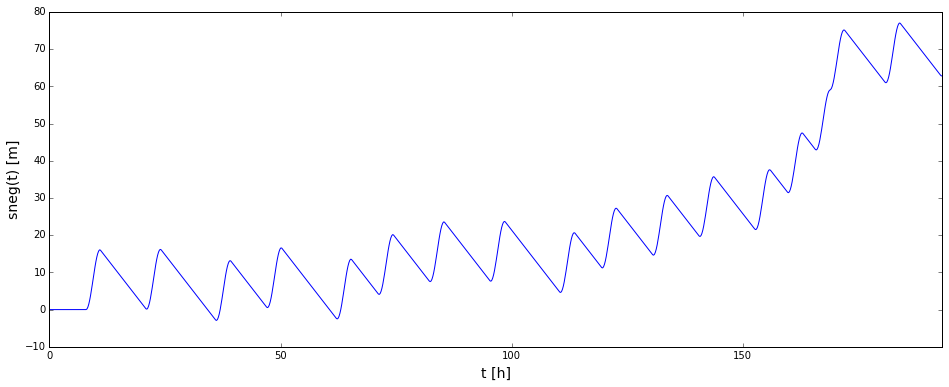

In [22]:
f, (sneg_na_strehi) = plt.subplots(1, figsize=(16,6))
sneg_na_strehi.plot(čas_dopusta, debelina_snega)
sneg_na_strehi.set_xlabel('t [h]', fontsize = 14)
sneg_na_strehi.set_ylabel('sneg(t) [m]', fontsize = 14)
#sneg_na_strehi.set_ylim(-5, 16)
sneg_na_strehi.set_xlim(0, teden)

Opomba: Ta graf je rešitev za primer, ko je višina snega veš čas pozitivna. Pravilna rešitev v splošnem (diferencialna enačba) je spodaj.

Diferencialno reševanje zgornjega problema:

In [23]:
čas_dopusta = np.linspace(0, teden, 10000) #če je premajhna delitev, bo izračun neuspešen

In [24]:
#Spisal sem svoj program, nisem uporabljal vgrajenih rešitev za reševanje (zaradi specifičnosti problema).

#Glavni problem:
#Ko se stopi ves sneg, mora hitrost kopnenja snega biti 0
#Če je t_i ničla enačbe h(t), potem mora za t_nevihtni[i+1] > t > t_i veljati, da je h'(t) = 0

h_t = [0] #seznam višin pri različnih časih

def h_odvod(t): #hitrost snega pri času t
    sneg_m = 0.15*60
    ti_neviht = [0]
    for ti in t_nevihtni:
        if ti <= t:
            ti_neviht.append(ti)
        t_0 = max(ti_neviht)
    if t_0 <= t <= t_0 + np.pi:
        h_od = sneg_m*np.sin(t - t_0) - v_kopnenje_počasno
        if h_t[-1] <= 0:
            h_t[-1] = 0
    else:
        h_od = -v_kopnenje_hitro
        if h_t[-1] <= 0:
            h_t[-1] = 0
            h_od = 0
    return h_od

In [25]:
tt = 0
for ti in čas_dopusta:
    if h_t[-1] <= 0:
        if h_odvod(ti) <= 0:
            h_t.append(0)
            tt = ti
        else:
            h_ti = romberg(h_odvod, tt, ti)
            h_t.append(h_ti)
    else:
        h_ti = romberg(h_odvod, tt, ti)
        h_t.append(h_ti)

/Users/Jan/anaconda/lib/python3.4/site-packages/scipy/integrate/quadrature.py:699: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.848061e-03
  AccuracyWarning)
/Users/Jan/anaconda/lib/python3.4/site-packages/scipy/integrate/quadrature.py:699: AccuracyWarning: divmax (10) exceeded. Latest difference = 9.145950e-04
  AccuracyWarning)
/Users/Jan/anaconda/lib/python3.4/site-packages/scipy/integrate/quadrature.py:699: AccuracyWarning: divmax (10) exceeded. Latest difference = 9.509082e-04
  AccuracyWarning)
/Users/Jan/anaconda/lib/python3.4/site-packages/scipy/integrate/quadrature.py:699: AccuracyWarning: divmax (10) exceeded. Latest difference = 3.919054e-03
  AccuracyWarning)
/Users/Jan/anaconda/lib/python3.4/site-packages/scipy/integrate/quadrature.py:699: AccuracyWarning: divmax (10) exceeded. Latest difference = 5.717966e-04
  AccuracyWarning)
/Users/Jan/anaconda/lib/python3.4/site-packages/scipy/integrate/quadrature.py:699: AccuracyWarning: divmax (10) exceeded. Latest d

In [26]:
len(h_t)

10001

In [27]:
len(čas_dopusta)

10000

In [28]:
h_t_novi = h_t[1:]

In [29]:
len(h_t_novi)

10000

(0, 193.2)

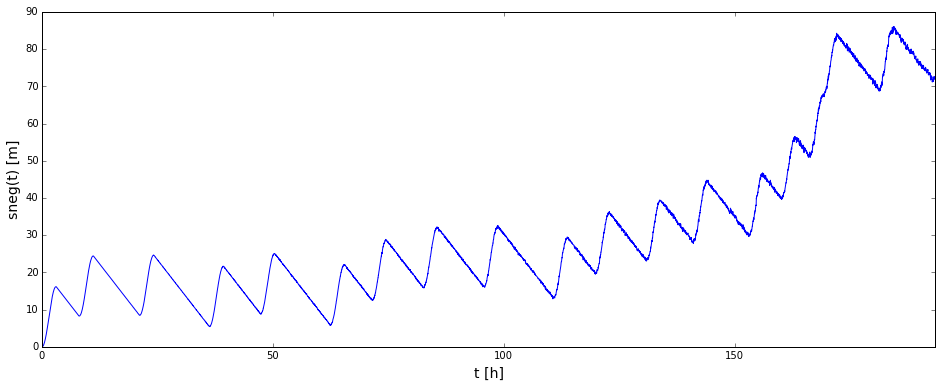

In [30]:
f, (sneg_na_strehi_pravi) = plt.subplots(1, figsize=(16,6))
sneg_na_strehi_pravi.plot(čas_dopusta, h_t_novi)
sneg_na_strehi_pravi.set_xlabel('t [h]', fontsize = 14)
sneg_na_strehi_pravi.set_ylabel('sneg(t) [m]', fontsize = 14)
#sneg_na_strehi_pravi.set_ylim(-5, 16)
sneg_na_strehi_pravi.set_xlim(0, teden)

### Maksimalna količina snega na strehi in končna količina snega

In [31]:
končna_debelina_snega = h_t_novi[-1]
končna_debelina_snega

72.26541960183809

In [32]:
max(h_t_novi)

86.0839686219892

### Vpliv teže snega na streho

Obremenitev zaradi snega je kontinuirna, linearna.

Inženirji so pred odmetavanjem snega izvedli meritve na vsak meter dolžine strehe.

In [36]:
from scipy import optimize

In [33]:
#podatki
x_os = np.arange(0, 101, 1)
debelina = []
for i in x_os:
    debelina.append(random.gauss(končna_debelina_snega, 0.9))
    
debelina = np.array(debelina)

In [34]:
#obremenitev
širina_strehe = 100 #m
def deb_sneg(x, d):
    return d

In [37]:
d = optimize.curve_fit(deb_sneg, x_os, debelina)[0][0]

In [38]:
d

72.29787805538831

In [39]:
#obremenitev
širina_strehe = 100 #m
gostota = 0.92 #kg/dm**3
g = 11.03 #m/s**2
def q(x):
    teža = d*širina_strehe*gostota*g
    return teža

Te podatke sem nato vnesel v program.

Slika:

<img src="diagrami.png"><img/>